# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parte 1 – Compreensão inicial do problema

Após carregar o .csv em um dataframe, observe os nomes das colunas da tabela.  

Responda: Quais colunas você acredita que são mais importantes para decidir se vale a pena instalar um sistema de energia solar em uma residência ou empresa? Justifique.  

**Resposta:**

Solar_Potential_kWh_m2

Justificativa: Representa o potencial de geração de energia solar por metro quadrado. Quanto maior, maior a capacidade de geração de energia solar e, portanto, maior o retorno esperado do sistema fotovoltaico.

Installation_Area_m2

Justificativa: Indica a área disponível para a instalação dos painéis solares. Mesmo com alto potencial solar, sem área suficiente, o sistema não será viável.

Energy_Demand_kWh

Justificativa: Reflete o consumo de energia da edificação. Um alto consumo torna a geração própria mais atrativa economicamente, já que substitui energia comprada da rede.

Payback_Period_Years

Justificativa: Informa em quantos anos o investimento se paga. Um payback curto indica um retorno financeiro mais rápido e, geralmente, maior viabilidade.

Optimal_Solar_Utilization_%

Justificativa: Mostra o quanto do potencial solar está sendo efetivamente utilizado. Um percentual alto indica que o sistema solar está sendo bem aproveitado

In [ ]:
df = pd.read_csv('green_energy_dataset.csv')
df.head()

,Building_Type,Year_Built,Floor_Area_m2,Orientation,Material,Insulation_Level,Solar_Potential_kWh_m2,Wind_Potential_m_s,Geothermal_Potential,Energy_Demand_kWh,Installation_Area_m2,Carbon_Reduction_%,Payback_Period_Years,Optimal_Solar_Utilization_%
0,Stone_Villa,1844,67,East,Stone,Medium,4.962383,2.202131,1.232814,8740,78,25.377517,11.399095,22.983017
1,Thatched_Hut,1900,89,North,Timber,High,4.914787,4.494622,1.286294,5358,34,26.925844,8.824947,7.357229
2,Wooden_House,1911,70,North,Timber,Medium,4.709916,2.531980,1.500403,8777,29,24.824728,7.493479,11.280055
3,Stone_Villa,1919,192,North,Brick,Low,7.401493,4.169215,0.900716,10906,60,31.956198,5.050910,16.585626
4,Stone_Villa,1939,274,West,Brick,Low,4.180462,4.318013,1.865997,15563,46,21.513738,5.426386,10.145989


# Parte 2 – Visualização dos dados

Vamos visualizar a distribuição de algumas colunas. Utilizem o pacote que quiserem, mas sugiro utilizar o seaborn,

2.1 Gere histogramas para pelo menos duas variáveis numéricas.

https://seaborn.pydata.org/generated/seaborn.histplot.html

2.2 Gere gráficos de barras (bar plots) para pelo menos duas variáveis categóricas.

https://seaborn.pydata.org/generated/seaborn.barplot.html

Esses gráficos ajudam a entender a frequência de ocorrência dos valores e a distribuição geral das variáveis.  

Responda: Você observa algum padrão nesses dados? Essas distribuições se parecem com alguma distribuição que vimos em aula?  

**Resposta:**

As categorias têm frequências semelhantes, como nas distribuições uniformes que vimos em aula.

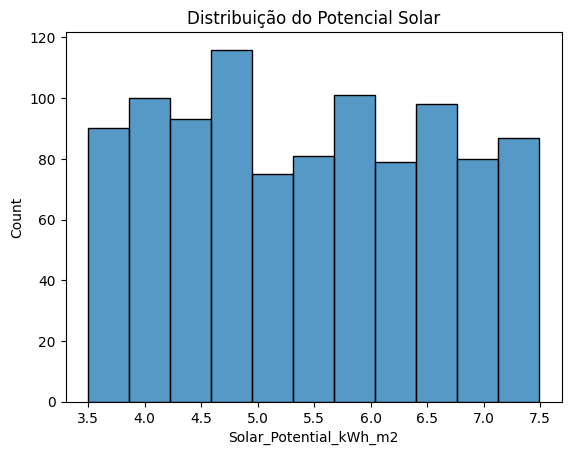

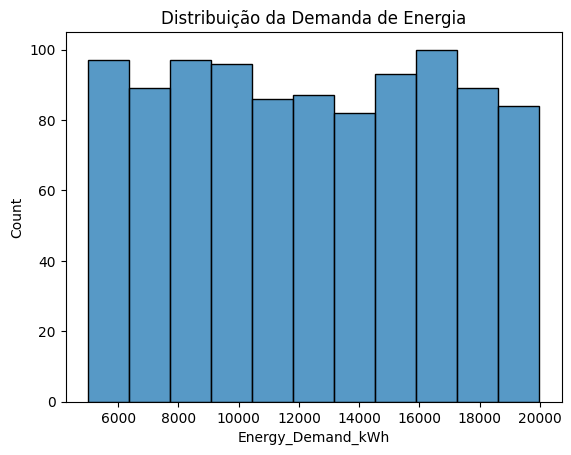

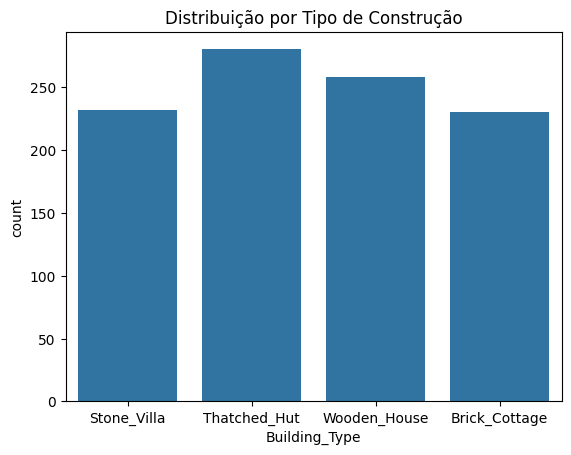

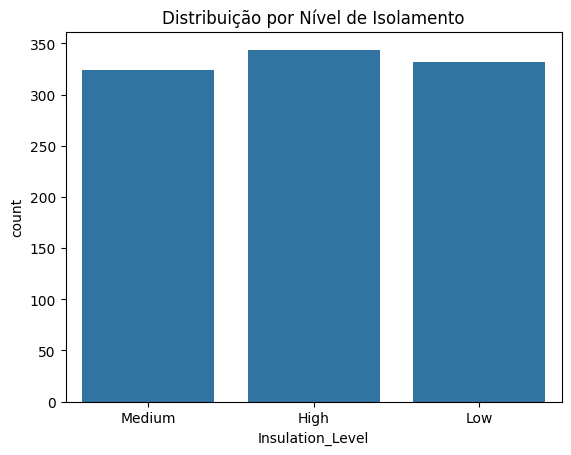

In [ ]:
df = pd.DataFrame(df)

sns.histplot(df["Solar_Potential_kWh_m2"])
plt.title("Distribuição do Potencial Solar")
plt.show()

sns.histplot(df["Energy_Demand_kWh"])
plt.title("Distribuição da Demanda de Energia")
plt.show()

sns.countplot(x="Building_Type", data=df)
plt.title("Distribuição por Tipo de Construção")
plt.show()

sns.countplot(x="Insulation_Level", data=df)
plt.title("Distribuição por Nível de Isolamento")
plt.show()

# Parte 3 – Explorando Relações entre colunas com Pair Plot

Vamos explorar se existe uma relação entre duas variáveis numéricas:

Optimal_Solar_Utilization_% e Installation_Area_m2.

Crie um pairplot com essas duas colunas utilizando seaborn

https://seaborn.pydata.org/generated/seaborn.pairplot.html

Em um pairplot, gera-se o scatterplot() para pares de variáveis diferentes (fora da diagonal) e histplot() para distribuições de variáveis ao longo da diagonal. Ou seja, mostra comportamentos individuais (diagonal) e se há relações entre colunas (fora da diagonal)  

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://seaborn.pydata.org/generated/seaborn.histplot.html

Responda: Observando o pairplot, existe uma relação entre essas duas colunas? Seja em caso positivo ou negativo, avalie se o resultado faz sentido (era esperado) ou não.  

**Resposta**:

Quanto maior a área disponível para instalação, maior tende a ser o percentual de aproveitamento solar ótimo.

 Faz sentido uma área livre maior comporta mais Painéis, aproveitando uma parcela maior do potencial solar; logo, se esse comportamento.

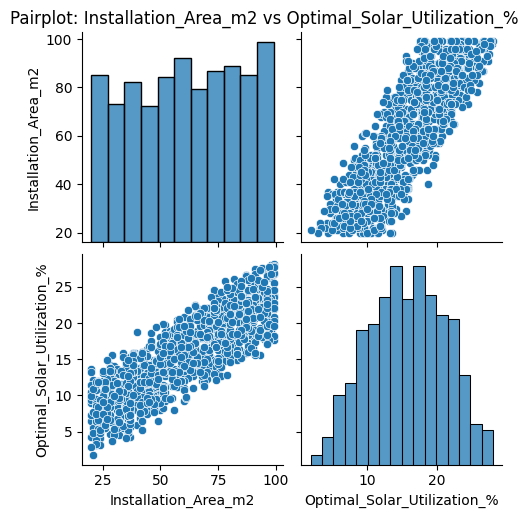

In [ ]:

cols = ['Installation_Area_m2', 'Optimal_Solar_Utilization_%']
df_subset = df[cols]

sns.pairplot(
    df_subset,
    kind='scatter',
    diag_kind='hist'
)


plt.suptitle('Pairplot: Installation_Area_m2 vs Optimal_Solar_Utilization_%', y=1.02)


plt.show()

# Parte 4 – Explorando relações entre outras colunas

Pense em outro par de variáveis numéricas que, segundo seu entendimento, poderiam apresentar relações, gere um novo pairplot e analise o resultado.  

Responda: A relação esperada apareceu? A forma do gráfico confirma sua hipótese?

**Resposta**

Par de variaiveis: Floor_Area_m2 vs Energy_Demand_kWh
Relação esperada:
 Quanto maior a àrea de Instalação, mais painéis, consequentemente demandando mais energia,
 porem, o gráfico não confirma minha hipótese, os gráficos não demonstram nenhum tipo de padrão ou correlação entre as duas váriaives.

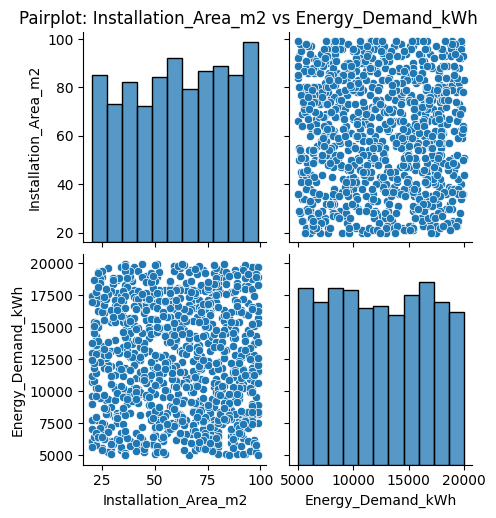

In [ ]:
cols_new = ['Installation_Area_m2', 'Energy_Demand_kWh']
df_new = df[cols_new]

sns.pairplot(
    df_new,
    kind='scatter',
    diag_kind='hist'
)
plt.suptitle('Pairplot: Installation_Area_m2 vs Energy_Demand_kWh', y=1.02)

plt.show()

# Parte 5 – Reflexão final sobre o dataset

Após todas essas análises, reflita e escreva sobre a origem do dataset. Vocês acreditam que este dataset foi coletado de forma real, a partir de uma pesquisa de verdade em casas, ou que ele foi simulado artificialmente?

Dicas para reflexão:

* As distribuições das variáveis categóricas são realistas? Por exemplo, se a distribuições das variáveis categóricas se aproximarem muito de distribuições uniformes, estaremos em uma situação conhecida como dados balanceados. Será que dados reais são realmente balanceados?

* Os gráficos de dispersão mostram padrões naturais com variação, ou relações muito exatas e perfeitas? Houve uma diferença nos resultados das Partes 4 e 5? Essa diferença era esperada ou inesperada? Isso pode ser algum indício de que os dados foram gerados artificialmente?




**1. Padrões de dispersão e correlações**
Na Parte 3, com Installation_Area_m2 vs Optimal_Solar_Utilization_%, vimos uma correlação quase linear perfeita. Dados de reais geralemente exibem ruído e apareceria dispersão em torno da tendência.

Em pares como Instalation Area vs Energy_Demand_kWh, apareceu dispersão totalmente aleatória também pouco plausível, mesmo com variabilidade, há sempre tendência de maior consumo em Áreas de Instalação maiores.

**2. Consistência entre resultados**

Passamos de uma correlação matemática perfeita para um afastamento total de qualquer padrão, observando os gráficos da parte 3 e 4. Em cenários reais, dificilmente as medições saltam de uma reta exata para um caos completo; observa-se antes uma gradação de ruído e pequenos desvios, não extremos radicalmente distintos.

**Conclusão**

Os padrões de uniformidade em variáveis diversas e a alternância entre correlações extremas e ausentes indicam que os dados muito provavelmente foram simulados. Embora úteis para demonstrações, não capturam o ruído natural e a variação de campo que caracterizam pesquisas reais.